## **Installing and Importing Necessary Libraries**

In [2]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import seaborn as sns 

In [3]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.9/275.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 107.8 MB/s eta 0:00:0000:0100:01


## **Loading the dataset**

In [4]:
data = pd.read_csv('/kaggle/input/stock-news/stock_news.csv')

In [5]:
data.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [6]:
data.shape

(349, 8)

### *Problem Definition:*

To develop an AI-driven sentiment analysis system which can understand the stock-related news' sentiment and then estimate it's impact on the Company's stock prices.

This will be done through analysis of historical news articles, and then building a model to predict stock price movements based on news sentiment

### Univariate Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

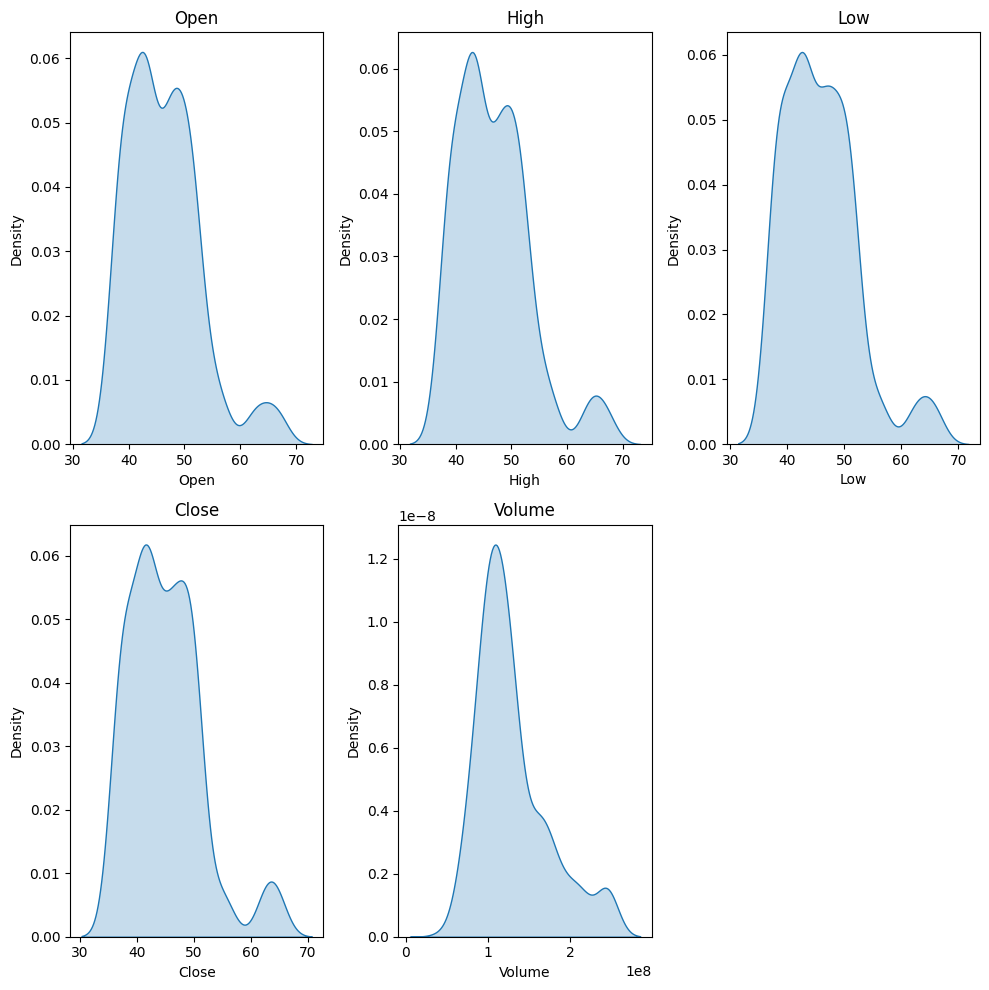

In [7]:
import math

# Plotting a Histogram for all the numerical variables

numeric = ['Open', 'High', 'Low', 'Close', 'Volume']

#Length of columns
num_columns = len(numeric)

# Calculating number of rows and columns
nrows = math.ceil(num_columns / 3)  
ncols = 3  

#Plotting
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

axes = axes.flatten()

for i, column in enumerate(numeric):
    sns.kdeplot(data[column].dropna(), ax=axes[i], fill=True)
    axes[i].set_title(column)

# Removing empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Obersravtions:

All the above graphs display multiple peaks on Histogram and there's a specific right skewness amongst all the numeric varaibles

<Axes: xlabel='Label', ylabel='count'>

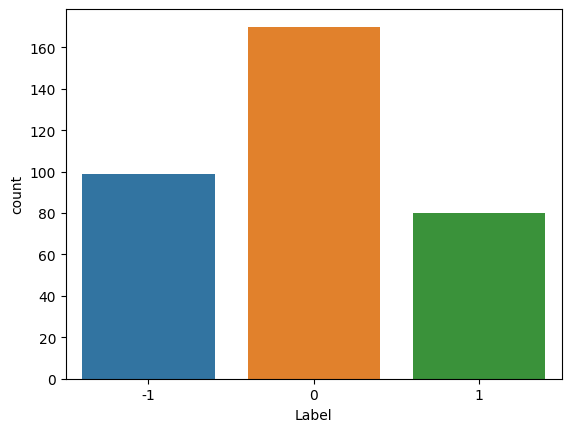

In [8]:
# Univariate Analysis of Sentiment Labels 

sns.countplot(data, x= 'Label')

Observations:
* There are many (~50%) of the News articles with "Neutral" label

In [9]:
# Univariate - understanding the summary metrics of numerical columns from dataframe

data[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
Open,349.0,4.622923e+01,6.442817e+00,3.756750e+01,4.174000e+01,4.597500e+01,5.070750e+01,6.681750e+01
High,349.0,4.670046e+01,6.507321e+00,3.781750e+01,4.224500e+01,4.602500e+01,5.085000e+01,6.706250e+01
Low,349.0,4.574539e+01,6.391976e+00,3.730500e+01,4.148250e+01,4.564000e+01,4.977750e+01,6.586250e+01
Close,349.0,4.492632e+01,6.398338e+00,3.625413e+01,4.024691e+01,4.459692e+01,4.911079e+01,6.480523e+01
Volume,349.0,1.289482e+08,4.317031e+07,4.544800e+07,1.032720e+08,1.156272e+08,1.511252e+08,2.444392e+08


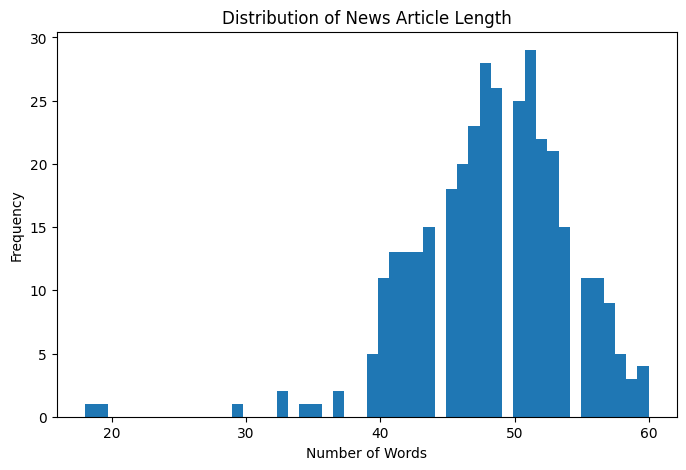

In [10]:
# Distribution of news content length

#Creating a new variable which counts the length of the News Article

df = pd.DataFrame()

df['News_Length'] = data['News'].apply(lambda x: len(str(x).split()))
df['News'] = data['News'].copy

plt.figure(figsize=(8, 5))
plt.hist(df['News_Length'], bins=50)
plt.title('Distribution of News Article Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

Observations:

* Most of the news articles have a length of 40 to 60 words
* Lowest number of words in a news article are about 18 while the hightest are about 60 words

#### Bi-variate Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

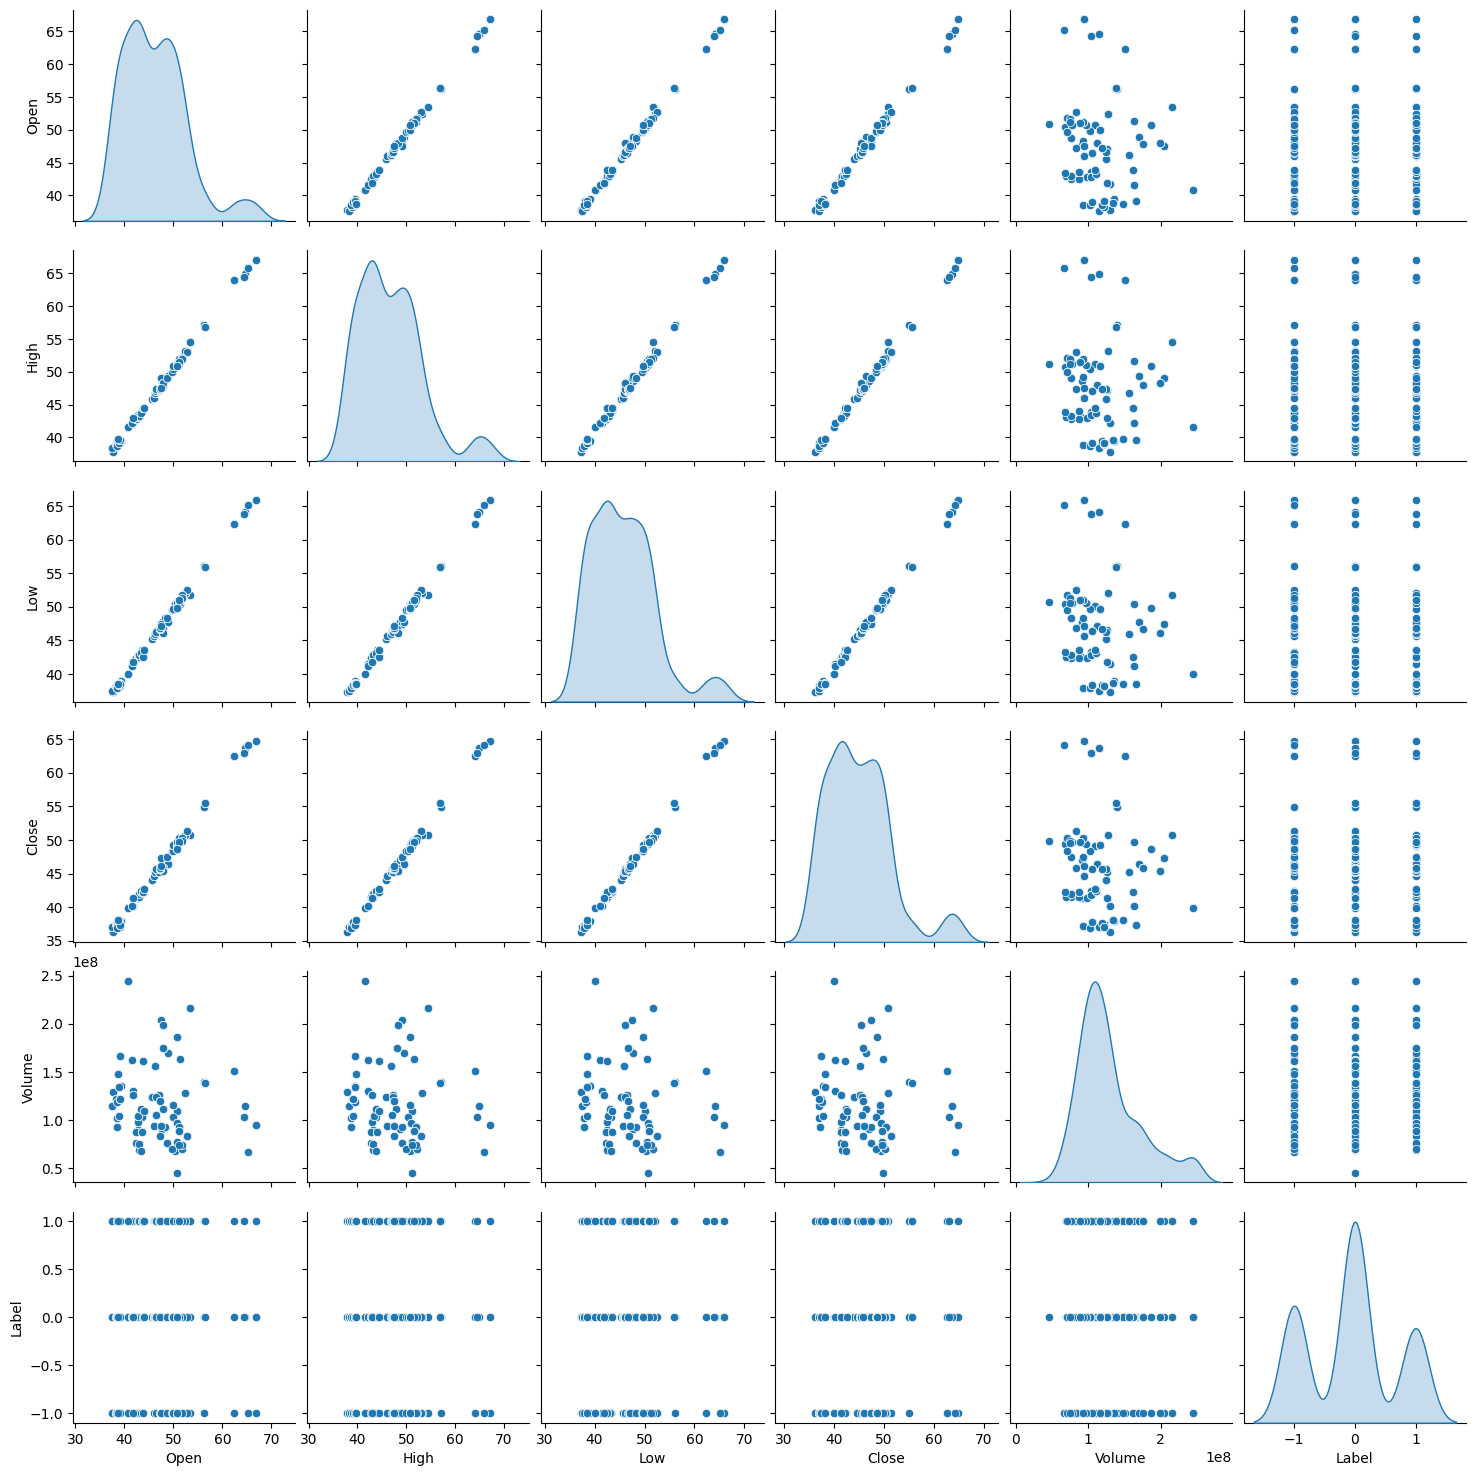

In [11]:
#Pair Plots

numeric2 = ['Open', 'High', 'Low', 'Close', 'Volume', 'Label']
sns.pairplot(data[numeric2], diag_kind = 'kde');

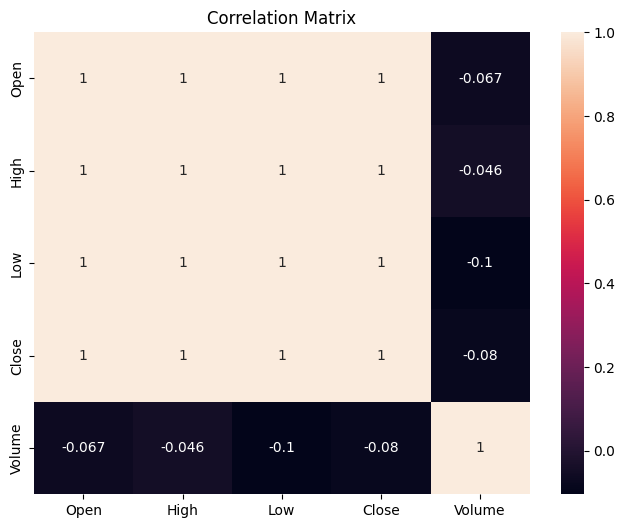

In [12]:
# Correlation matrix

correlation_matrix = data[numeric].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket')
plt.title('Correlation Matrix')
plt.show()

Observations:
* There's a storng postive linear relationship between 'Open', 'High', 'Low', and 'Close' variables
* Volume variable has no linear relationship with any of the 'Open', 'High', 'Low', and 'Close' variables

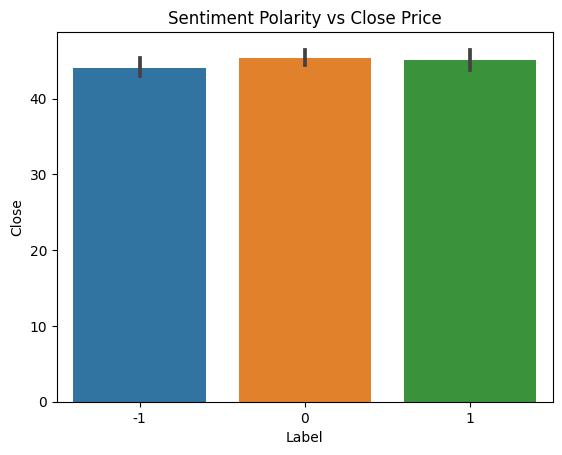

In [13]:
'''
Sentiment Polarity vs Price using Bar Plot. Here, for the "Price", the closing value of the stock 
is considered
'''

sns.barplot(data=data, x='Label', y='Close')
plt.title('Sentiment Polarity vs Close Price')
plt.show()

Observation:
* There appears to be not much variation in the "Closing Price" for each of the labels which ***might*** suggest that the article's sentiment is not impacting the closing price of the stock

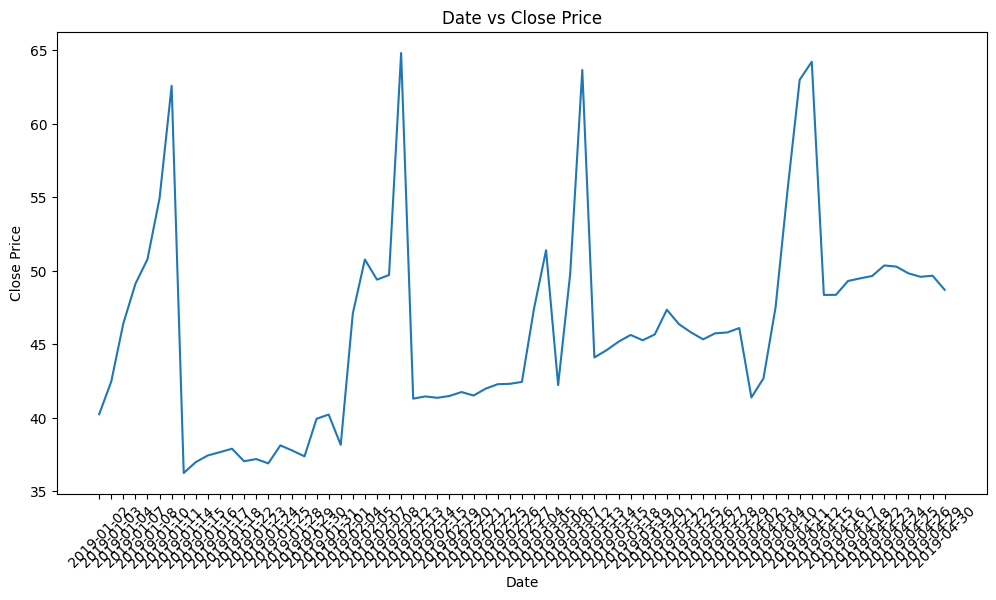

In [14]:
# Date vs Price Analysis

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'])
plt.title('Date vs Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

Observations:
* The price of the stock is highly inconsistent and fluctuates through-out the time period considered for the analysis

## **Data Preprocessing**

In [15]:
from sklearn.model_selection import train_test_split

# Splitting target variable and predictors

'''
Note: My first task is to build a DL model which can accurately understand the Sentiment 
of the News article. 
This sentiment will later be used to determine the impact of news article on the stock price, 
if required.
'''

X = data['News']
y = data['Label']

In [16]:
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=79)

In [17]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=79) 

In [18]:
# Printing the shapes of each of the sets
print(f"Train data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")
print(f"Test data shape: {X_test.shape}, {y_test.shape}")

Train data shape: (244,), (244,)
Validation data shape: (52,), (52,)
Test data shape: (53,), (53,)


## **Word Embeddings**

In [19]:
# Again import all the required libraries

from gensim.models import Word2Vec
from gensim.models import KeyedVectors 
from sentence_transformers import SentenceTransformer 
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt') 

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# Part- 1: Word2Vec 

# Tokenize the text 
train_sentences = [sentence.split() for sentence in X_train]

In [21]:
# Training the  Word2Vec model
word2vec_model = Word2Vec(sentences=train_sentences, vector_size=100, window=5, min_count=1, workers=4)

In [22]:
# Part-2: GloVe (Using pre-trained GloVe embeddings) -- Using the provided GloVe file

glove_model = KeyedVectors.load_word2vec_format('/kaggle/input/word-embeddings-glove/glove.6B.100d.txt.word2vec') 

In [23]:
# Part-3: Sentence Transformer

sentence_transformer_model = SentenceTransformer('all-mpnet-base-v2') 

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [24]:
train_sentence_embeddings = sentence_transformer_model.encode(X_train.tolist()) 

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

In [25]:
# Printing examples for accessing word embeddings from each of the models

print("Word2Vec embedding for 'revenue':", word2vec_model.wv['revenue'])

Word2Vec embedding for 'revenue': [-0.01191046  0.02631211  0.01266101 -0.00579079  0.00944668 -0.03896784
  0.02636887  0.04599092 -0.02146713 -0.02344768 -0.01223299 -0.04661844
  0.00349074  0.01007973  0.01622706 -0.02736921  0.00829384 -0.02443322
  0.00614352 -0.05985516  0.02429657 -0.00117482  0.02267691 -0.01740407
 -0.00544514  0.00504636 -0.01532591 -0.01385808 -0.02256671  0.00092983
  0.02367194  0.00764418 -0.00179681 -0.02972069 -0.00205792  0.03093068
 -0.00280182 -0.00757257 -0.00597777 -0.03995716  0.01638713 -0.03394339
 -0.00205362  0.01002223  0.02445548 -0.01313195 -0.02201448 -0.00898169
  0.0096608   0.02047418  0.01724824 -0.01658706  0.00516408 -0.00853945
 -0.00453451  0.0058666   0.01823492 -0.00380873 -0.02047275  0.00710017
  0.00561103  0.00040177 -0.00600054  0.01231267 -0.01936043  0.03509192
  0.00856169  0.02471116 -0.02359417  0.02115218 -0.00740592  0.00733045
  0.03104418  0.01511505  0.03972738  0.02046188  0.00485984  0.00991777
 -0.00655061  0.0

In [26]:
print("GloVe embedding for 'revenue':", glove_model['revenue']) 

GloVe embedding for 'revenue': [ 0.17132   -0.042936   0.48587   -0.49912    0.83222   -0.79533
 -0.39641    0.0059214  0.065537  -0.35212    0.40528   -0.12115
 -0.15325   -0.46874    0.2268    -0.80513    0.065305   0.25888
  0.4961     1.0646     0.14317    0.11955   -0.35765    1.0962
 -0.57384   -0.62014    0.54423   -0.20712   -0.67822   -0.82173
  0.6037     0.26209   -0.18882   -0.90291   -0.181      0.43017
 -0.30814    0.15839   -0.0065962 -0.20375    0.52302   -0.75001
 -0.35737    0.38933    0.2421    -0.1404    -0.19481   -0.97056
 -0.169     -1.1695     0.089281  -0.098044   0.5469     0.888
  0.42843   -1.8364     0.083037  -0.59659    2.2736     0.21042
  0.21198   -1.0437    -0.66913    0.5043    -0.44588   -0.025209
 -0.1372    -0.15207    1.482     -0.17329    0.69726   -0.10271
  0.37622   -0.016729   0.18066   -0.3527     0.070993   0.019209
 -1.0751     0.62373    0.42793    0.28526   -0.30414   -0.24486
 -1.0767    -0.78603   -0.034846  -1.1542    -0.12238    0.0

In [27]:
print("Sentence Transformer embedding for the first training sentence:", train_sentence_embeddings[0])

Sentence Transformer embedding for the first training sentence: [ 8.20593908e-03  1.03708133e-02 -2.99020968e-02 -2.99749300e-02
  6.48171455e-02 -6.06192388e-02  1.10738594e-02  1.83741376e-02
 -6.12694770e-02 -3.41976546e-02 -2.78722346e-02  9.50978547e-02
  3.27915512e-02  4.41417806e-02 -2.56269965e-02  6.78397641e-02
  5.65958284e-02  2.83585191e-02 -9.07573700e-02 -2.90547893e-03
  1.11658257e-02  5.76601774e-02  4.07068431e-02 -2.20328178e-02
 -7.57234730e-03  2.36635115e-02  1.17786657e-02 -2.04019882e-02
  3.18168513e-02 -1.28657334e-02  4.95500341e-02 -1.99030992e-02
  2.14947518e-02 -7.65332729e-02  2.18451487e-06  1.09232822e-02
 -3.51230614e-02  3.68611068e-02 -5.58709763e-02  4.63348404e-02
 -3.31080556e-02  5.50760282e-03  2.48872545e-02  3.12304869e-02
 -5.09693585e-02 -3.61586665e-03 -2.89194267e-02  4.23438139e-02
 -5.47915231e-03  4.50768173e-02  1.08768623e-02  5.59515283e-02
  1.42168328e-02  7.54517876e-03 -4.07809950e-02 -4.82217222e-02
 -8.22475180e-04 -1.542270

In [31]:
# Fitting the Word2Vec embeddings to all the New's articles from X_train, X_test, and X_validate


# Creating a UDF for conversion

def get_word2vec_embeddings(sentences, model):
    embeddings = []
    for sentence in sentences:
        sentence_vec = np.zeros(model.vector_size)
        count = 0
        for word in sentence:
            try:
                sentence_vec += model.wv[word]
                count += 1
            except KeyError:
                continue  # Ignore OOV words
        if count > 0:
            sentence_vec /= count
        embeddings.append(sentence_vec)
    return np.array(embeddings)


In [33]:
X_train_word2vec = get_word2vec_embeddings(train_sentences, word2vec_model)
X_val_word2vec = get_word2vec_embeddings([sentence.split() for sentence in X_val], word2vec_model)
X_test_word2vec = get_word2vec_embeddings([sentence.split() for sentence in X_test], word2vec_model)

In [35]:
# Printing the shapes of each of the sets
print(f"Train data shape for Word2Vec: {X_train_word2vec.shape}")
print(f"Validation data shape for Word2Vec: {X_val_word2vec.shape}")
print(f"Test data shape for Word2Vec: {X_test_word2vec.shape}")

Train data shape for Word2Vec: (244, 100)
Validation data shape for Word2Vec: (52, 100)
Test data shape for Word2Vec: (53, 100)


In [36]:
# Again, fitting the GloVe embeddings to all the New's articles from X_train, X_test, and X_validate

def get_glove_embeddings(sentences, model):
    def sentence_vector(sentence):
        words = sentence.split()
        vectors = np.array([model[word] if word in model else np.random.rand(100) for word in words])
        return vectors.mean(axis=0) if len(vectors) > 0 else np.zeros(100)
    
    return np.array([sentence_vector(sentence) for sentence in sentences])

X_train_glove = get_glove_embeddings(X_train, glove_model)
X_val_glove = get_glove_embeddings(X_val, glove_model)
X_test_glove = get_glove_embeddings(X_test, glove_model)

In [37]:
# For Sentence Transformer

sentence_transformer_model = SentenceTransformer('all-mpnet-base-v2') 
X_train_sbert = sentence_transformer_model.encode(X_train.tolist())
X_val_sbert = sentence_transformer_model.encode(X_val.tolist())
X_test_sbert = sentence_transformer_model.encode(X_test.tolist())

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

## **Sentiment Analysis**

In [28]:
# Model Building - Usinf Logistic Regression

#Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [29]:
#Using 'Logistic Regression' as my base ML model with Word2Vec 

logreg_word2vec = LogisticRegression(max_iter=1000) 

In [39]:
#Fitting the model

logreg_word2vec.fit(X_train_word2vec, y_train)

LogisticRegression(max_iter=1000)

In [45]:
# Creating a UDF for calculating 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # To handle binary vs multiclass AUC
    if len(set(y_test)) == 2: 
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else: 
        auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr", average="weighted")
    
    return accuracy, precision, recall, f1, auc


In [48]:
# Predicting y_train using the Word2Vec Logistic Regression

word2vec_metrics = evaluate_model(logreg_word2vec, X_val_word2vec, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print("Word2Vec Model:")
print(f"Validation Accuracy: {word2vec_metrics[0]:.2f}")
print(f"Validation Precision: {word2vec_metrics[1]:.2f}")
print(f"Validation Recall: {word2vec_metrics[2]:.2f}")
print(f"Validation F1-score: {word2vec_metrics[3]:.2f}")
print(f"Validation AUC-ROC: {word2vec_metrics[4]:.2f}")

Word2Vec Model:
Validation Accuracy: 0.44
Validation Precision: 0.20
Validation Recall: 0.44
Validation F1-score: 0.27
Validation AUC-ROC: 0.49


In [52]:
# Creating a similar model for GloVe

logreg_glove = LogisticRegression(max_iter=1000, random_state=79) 
logreg_glove.fit(X_train_glove, y_train)

LogisticRegression(max_iter=1000, random_state=79)

In [54]:
# Evaluating GloVe model

glove_metrics = evaluate_model(logreg_glove, X_val_glove, y_val) 
print("\nGloVe Model:")
print(f"Validation Accuracy: {glove_metrics[0]:.2f}")
print(f"Validation Precision: {glove_metrics[1]:.2f}")
print(f"Validation Recall: {glove_metrics[2]:.2f}")
print(f"Validation F1-score: {glove_metrics[3]:.2f}")
print(f"Validation AUC-ROC: {glove_metrics[4]:.2f}")


GloVe Model:
Validation Accuracy: 0.46
Validation Precision: 0.62
Validation Recall: 0.46
Validation F1-score: 0.40
Validation AUC-ROC: 0.67


In [56]:
# Logistic Reg for Sentence Transformer

logreg_sbert = LogisticRegression(max_iter=1000, random_state=79)
logreg_sbert.fit(X_train_sbert, y_train)

LogisticRegression(max_iter=1000, random_state=79)

In [57]:
#Sentence Transformer's model evaluation

sbert_metrics = evaluate_model(logreg_sbert, X_val_sbert, y_val) 
print("\nSentence Transformer Model:")
print(f"Validation Accuracy: {sbert_metrics[0]:.2f}")
print(f"Validation Precision: {sbert_metrics[1]:.2f}")
print(f"Validation Recall: {sbert_metrics[2]:.2f}")
print(f"Validation F1-score: {sbert_metrics[3]:.2f}")
print(f"Validation AUC-ROC: {sbert_metrics[4]:.2f}")


Sentence Transformer Model:
Validation Accuracy: 0.48
Validation Precision: 0.50
Validation Recall: 0.48
Validation F1-score: 0.42
Validation AUC-ROC: 0.73


### **Model's Chosen Metric**

* To determine each of the model's performance, I've decided to consider **"F1-Score"** as the metric.

Reasoning: Provided most of the labels in the given .csv file are neutral ('0'), I believe using F1-score which strikes the balance between Precision and Recall to be a better metric as compared to accuracy. Since, this will actually help me determine how a Sentimental News Article (either positive or negative) impacts the share price of the Company's stock.

Lastly, as a secondary measure to determine my model's performance, I choose to use accuracy.



* **Reasonaing for choosing Logistic Regression**: provided the given task is a classification one with 3 classes ([-1,0,1]), I chose one the simplest classification models for this task

#### **Hyper-parameter Tuning**

In [67]:
# Creating another UDF to find the best suitable Hyper-parameters using RandomizedSearchCV()

# Function for hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV


param_distributions = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

def tune_hyperparameters(X_train, y_train, X_val, y_val):
    grid_search = RandomizedSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42), 
                              param_distributions=param_distributions, 
                              scoring='f1_weighted', 
                              cv=5) 
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_f1 = grid_search.best_score_
    return best_model, best_f1


In [68]:
# Tuning the above models
logreg_word2vec_tuned, word2vec_tuned_f1 = tune_hyperparameters(X_train_word2vec, y_train, X_val_word2vec, y_val)
logreg_glove_tuned, glove_tuned_f1 = tune_hyperparameters(X_train_glove, y_train, X_val_glove, y_val)
logreg_sbert_tuned, sbert_tuned_f1 = tune_hyperparameters(X_train_sbert, y_train, X_val_sbert, y_val)

In [69]:
# Evaluating the above tuned models on validation set 

word2vec_tuned_metrics = evaluate_model(logreg_word2vec_tuned, X_val_word2vec, y_val)

glove_tuned_metrics = evaluate_model(logreg_glove_tuned, X_val_glove, y_val)

sbert_tuned_metrics = evaluate_model(logreg_sbert_tuned, X_val_sbert, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
#Printing the updated results after Hyper-parameter tuning

print("Word2Vec Tuned Model:")
print(f"Validation Accuracy: {word2vec_tuned_metrics[0]:.2f}")
print(f"Validation Precision: {word2vec_tuned_metrics[1]:.2f}")
print(f"Validation Recall: {word2vec_tuned_metrics[2]:.2f}")
print(f"Validation F1-score: {word2vec_tuned_metrics[3]:.2f}")
print(f"Validation AUC-ROC: {word2vec_tuned_metrics[4]:.2f}")

print("\nGloVe Tuned Model:")
print(f"Validation Accuracy: {glove_tuned_metrics[0]:.2f}")
print(f"Validation Precision: {glove_tuned_metrics[1]:.2f}")
print(f"Validation Recall: {glove_tuned_metrics[2]:.2f}")
print(f"Validation F1-score: {glove_tuned_metrics[3]:.2f}")
print(f"Validation AUC-ROC: {glove_tuned_metrics[4]:.2f}")

print("\nSentence Transformer Tuned Model:")
print(f"Validation Accuracy: {sbert_tuned_metrics[0]:.2f}")
print(f"Validation Precision: {sbert_tuned_metrics[1]:.2f}")
print(f"Validation Recall: {sbert_tuned_metrics[2]:.2f}")
print(f"Validation F1-score: {sbert_tuned_metrics[3]:.2f}")
print(f"Validation AUC-ROC: {sbert_tuned_metrics[4]:.2f}")

Word2Vec Tuned Model:
Validation Accuracy: 0.44
Validation Precision: 0.20
Validation Recall: 0.44
Validation F1-score: 0.27
Validation AUC-ROC: 0.40

GloVe Tuned Model:
Validation Accuracy: 0.50
Validation Precision: 0.50
Validation Recall: 0.50
Validation F1-score: 0.47
Validation AUC-ROC: 0.66

Sentence Transformer Tuned Model:
Validation Accuracy: 0.54
Validation Precision: 0.55
Validation Recall: 0.54
Validation F1-score: 0.53
Validation AUC-ROC: 0.71


### **Observations and conclusions:**

* Basis the updated models based on hyper-parameter tuning, I prefer to choose **Sentence Transformer Model** because of it's F-1 Score of 53%.
* Also, the updated Sentence Transformer Model's accuracy is the highest amongst all with 54% accuracy

## **Weekly News Summarization**

#### Installing and Importing the necessary libraries

In [72]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 26.2 MB/s eta 0:00:00:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for llama-cpp-python (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for llama-cpp-python
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (llama-cpp-python)


In [73]:
# Installation for CPU llama-cpp-python

!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


# **!!! NOTE !!!**


> Provided I've been working on Kaggle instead of Google Collab, I'm unable to install the 'GPU' version of 'LLAMA'.While 'CPU' version is install, considering the load on CPU (Kaggle has 16 GB RAM provided and llama's 7B model -> Model with least amount of parameters from llama), I have opted-out of choosing llama and prefer to go for a different **Transformer based, in this case BERT** model instead


In [74]:
# Using transformers

!pip install transformers accelerate

In [156]:
# Using bert-base-uncased and pre-trained pipeline Model from Hugging Face

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load pre-trained tokenizer and model

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

> Since my task requires me to tokenize 1 week's new articles and then understand their sentiments, I'll be using a light-weight version of BERT for faster processing

### **Grouping the Data**

In [77]:
# Converting 'Date' column to datetime format

data['Date'] = pd.to_datetime(data['Date'])

In [216]:
# Grouping data by week
weekly_data = data.groupby(pd.Grouper(key='Date', freq='W')).agg({
    'News': lambda x: ' # '.join(x), 
    'Open': 'first', 
    'High': 'max', 
    'Low': 'min', 
    'Close': 'last', 
    'Volume': 'sum'
})

'''
!!! Note !!!
While computing the goruped news articles, I've encountered trouble with splitting the data (even after using regex).
This created multiple issues while getting the top-3 positive/ negative sentences
Hence, I've decided to add "#" to every sentence's ending to determine the actual ending and begining of the sentence.
'''

'\n!!! Note !!!\nWhile computing the goruped news articles, I\'ve encountered trouble with splitting the data (even after using regex).\nThis created multiple issues while getting the top-3 positive/ negative sentences\nHence, I\'ve decided to add "#" to every sentence\'s ending to determine the actual ending and begining of the sentence.\n'

In [217]:
# Reseting index 
weekly_data = weekly_data.reset_index()

# Accessing data for the first week
week_news = weekly_data['News'].iloc[1]

In [209]:
week_news

' Sprint and Samsung plan to release 5G smartphones in nine U.S. cities this summer, with Atlanta, Chicago, Dallas, Houston, Kansas City, Los Angeles, New York City, Phoenix, and Washington D.C. being the initial locations. Rival Verizon also announced similar plans for the first half of 20  AMS, an Austrian tech company listed in Switzerland and a major supplier to Apple, has developed a light and infrared proximity sensor that can be placed behind a smartphone\'s screen. This allows for a larger display area by reducing the required space for sensors. AMS provides optical sensors for 3D facial recognition features on Apple  Deutsche Bank upgraded Vivendi\'s Universal Music Group valuation from €20 billion to €29 billion, surpassing the market cap of Vivendi at €28.3 billion. The bank anticipates music streaming revenue to reach €21 billion in 2023 and identifies potential suitors for  Amazon\'s stock is predicted to surge by over 20% by the end of this year, according to a new report

# -------------------------------------------------

In [218]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from nltk.tokenize import sent_tokenize


def generate_response(text, model_name="nlptown/bert-base-multilingual-uncased-sentiment"):
  tokenizer = AutoTokenizer.from_pretrained(model_name)
  model = AutoModelForSequenceClassification.from_pretrained(model_name, ignore_mismatched_sizes=True)

  sentences = text.split("#")

  predictions = []

  for sentence in sentences:
    inputs = tokenizer(sentence, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = logits.argmax(-1).item() 
    labels = ["VERY NEGATIVE", "NEGATIVE", "NEUTRAL", "POSITIVE", "VERY POSITIVE"]

    predictions.append({
        'text': sentence,
        'sentiment': labels[predicted_class]
    })

  return predictions

In [219]:
#Providing an instruction to identify 3 news articles (positive and negative) that might impact the stck price

task_instruction = """
Analyze weekly financial news and identify key events that are might impact the stock price. 
Specifically, identify top three most positive and negative events based on sentiment analysis.

"""

In [220]:
"""
  Below UDF extracts the top k positive and negative events and returns a dictionary 
  containing top positive and negative events.
"""


def get_top_events(predictions, top_k=3):
  positive_events = [pred['text'] for pred in predictions if pred['sentiment'] in ["POSITIVE", "VERY POSITIVE"]]
  negative_events = [pred['text'] for pred in predictions if pred['sentiment'] in ["NEGATIVE", "VERY NEGATIVE"]]


  top_positive_events = positive_events[:top_k] if positive_events else ['No positive events found.'] 
  top_negative_events = negative_events[:top_k] if negative_events else ['No negative events found.'] 

  return {
      "top_positive_events": top_positive_events,
      "top_negative_events": top_negative_events
  }

In [221]:
# Using the "Instruction" to get the top comments

weekly_news = week_news
predictions = generate_response(weekly_news)
top_events = get_top_events(predictions, top_k=3)

In [224]:
print("Top Positive Events:")
for event in top_events["top_positive_events"]:
  print("-",event, "\n")

print("\nTop Negative Events:")
for event in top_events["top_negative_events"]:
  print("-",event, "\n")

Top Positive Events:
-  Sprint and Samsung plan to release 5G smartphones in nine U.S. cities this summer, with Atlanta, Chicago, Dallas, Houston, Kansas City, Los Angeles, New York City, Phoenix, and Washington D.C. being the initial locations. Rival Verizon also announced similar plans for the first half of 20  

-   AMS, an Austrian tech company listed in Switzerland and a major supplier to Apple, has developed a light and infrared proximity sensor that can be placed behind a smartphone's screen. This allows for a larger display area by reducing the required space for sensors. AMS provides optical sensors for 3D facial recognition features on Apple  

-   Deutsche Bank upgraded Vivendi's Universal Music Group valuation from €20 billion to €29 billion, surpassing the market cap of Vivendi at €28.3 billion. The bank anticipates music streaming revenue to reach €21 billion in 2023 and identifies potential suitors for  


Top Negative Events:
-   Amazon's stock is predicted to surge by 

In [241]:
import pandas as pd

# Get top-3 positive and top-3 negative events
top_positive = get_top_events(predictions, top_k=3)
top_negative = get_top_events(predictions, top_k=3)

# Create DataFrame with required format
df_top_events = pd.DataFrame({
    "News": top_positive + top_negative,  # Concatenating both lists
    "Label": ["Positive"] * len(top_positive) + ["Negative"] * len(top_negative)
})

# Display the DataFrame
print(df_top_events)


Empty DataFrame
Columns: [News, Label]
Index: []


In [239]:
output_df1

,News,Label


In [243]:
# Extracting top positive and negative events
top_positive_events = top_events["top_positive_events"]
top_negative_events = top_events["top_negative_events"]

# Creating a DataFrame for Structure

df_top_events = pd.DataFrame({
    "News": top_positive_events + top_negative_events,  # Combine both lists
    "Label": ["Positive"] * len(top_positive_events) + ["Negative"] * len(top_negative_events)
})


In [247]:
#Displaying the top-3 positive/ negative statments 

print(df_top_events)

                                                News     Label
0   Sprint and Samsung plan to release 5G smartph...  Positive
1    AMS, an Austrian tech company listed in Swit...  Positive
2    Deutsche Bank upgraded Vivendi's Universal M...  Positive
3    Amazon's stock is predicted to surge by over...  Negative
4    Geely, China's most successful carmaker, for...  Negative
5    China is making sincere efforts to address U...  Negative


## **Observations and Analysis**

* Most of the news articles shared have netural sentiment associated with them
* The New's articles focused heavily on Apple's stock and hence, when ever there was a major Financial event occured in US, the stock had an impact on it
* Also, if run the above analysis for week-1 (shared analysis is performed for week-2), it can be noticed that the company's stock had a major impact when it shared it's quarterly results which were below expectations
* From the above analysis, it the impact of competitors launching new tech/ attraching huge investments into growing sectors led to a decline in companies stock price whereas Apple investing in new tech increase it's stock price
* Also, it is observable that, when a subsiday/supplier company of Apple receives investements or invests into new Tech, Apple's stock price also went up
* Lastly, China's financial markets also had a significant impact on Apple's stock due to their geopolitical reasons